# Research Notebook


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import datetime
from final_project_dfs.data_loader import data_loader
from final_project_dfs.fetch_y_pred import predict_dkfp
from final_project_dfs.genetic_selection import get_lineup
from final_project_dfs.post_process import post_process_results


2023-09-22 10:58:20,460 - INFO - Added is_repeat columns
2023-09-22 10:58:20,495 - INFO - Added KPIs columns
2023-09-22 10:58:20,496 - INFO - Added aggregate KPIs


## 1st Iteration
This iteration takes the basic data of 9 seasons, that is being generated elsewhere (we read it as a CSV, but can also run the code directly). This is where we can try and document our attempts and see what needs to be fixed

In [2]:
# Load the data
df = pd.read_csv('genetic_selection_res.csv')
df.head()

,Unnamed: 0,date,max_num_of_players,lineup_ideal,predicted_score_ideal,cost_ideal,actual_score_ideal,lineup_selected,predicted_score_selected,cost_selected,actual_score_selected,is_repeat,is_repeat_selected,precision,recall,f1,budget_efficiency_ideal,budget_efficiency_selected
0,0,2012-04-30,69,"['Carmelo Anthony', 'James Harden', 'LeBron Ja...",114.234798,527.404858,309.50,"['Brandan Wright', 'Brandan Wright', 'LeBron J...",152.393699,241.731248,115.00,1,1,0.142857,0.142857,0.142857,0.586836,0.475735
1,1,2012-04-29,99,"['Rajon Rondo', 'Andrew Bynum', 'Paul Pierce',...",140.180190,569.289008,337.25,"['Bobby Simmons', 'Marc Gasol', 'Blake Griffin...",194.801837,368.018367,149.25,1,1,0.000000,0.000000,0.000000,0.592406,0.405550
2,2,2012-04-28,93,"['Jason Terry', 'James Harden', 'Darren Collis...",105.639467,562.173584,291.50,"['Derrick Rose', 'James Jones', 'Lou Williams'...",165.317892,270.153031,126.25,1,0,0.000000,0.000000,0.000000,0.518523,0.467328
3,3,2012-04-26,305,"['DeJuan Blair', 'John Lucas III', 'Steve Nova...",128.808489,550.423590,287.75,"['Jordan Farmar', 'Ronnie Brewer', 'Gustavo Ay...",168.784410,220.253857,115.50,0,0,0.000000,0.000000,0.000000,0.522779,0.524395
4,4,2012-04-25,173,"['Ty Lawson', 'Russell Westbrook', 'Tobias Har...",102.974759,647.587008,397.00,"['Lou Williams', 'Kevin Durant', 'Jrue Holiday...",158.079865,375.554626,173.75,1,0,0.125000,0.142857,0.133333,0.613045,0.462649


## Plot Base KPIs

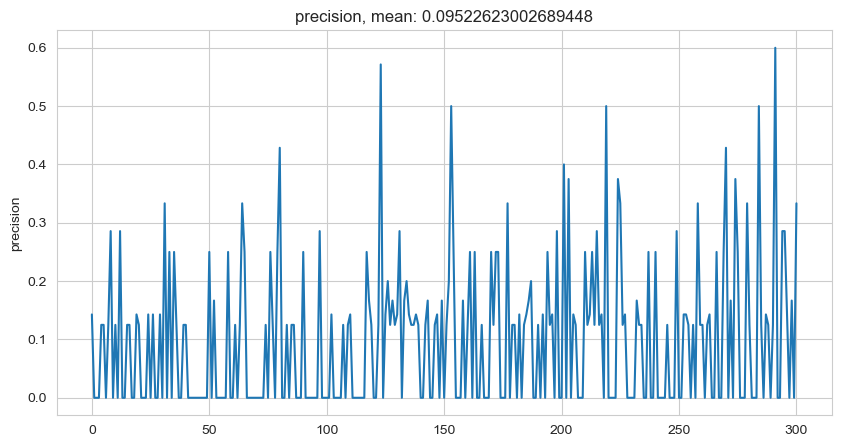

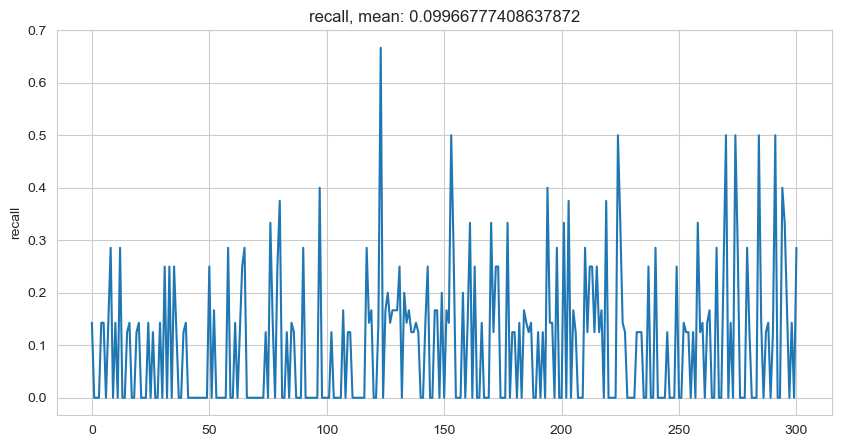

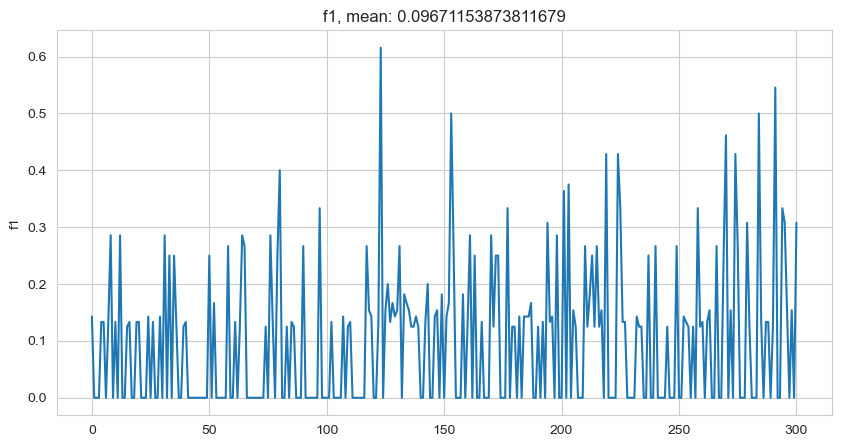

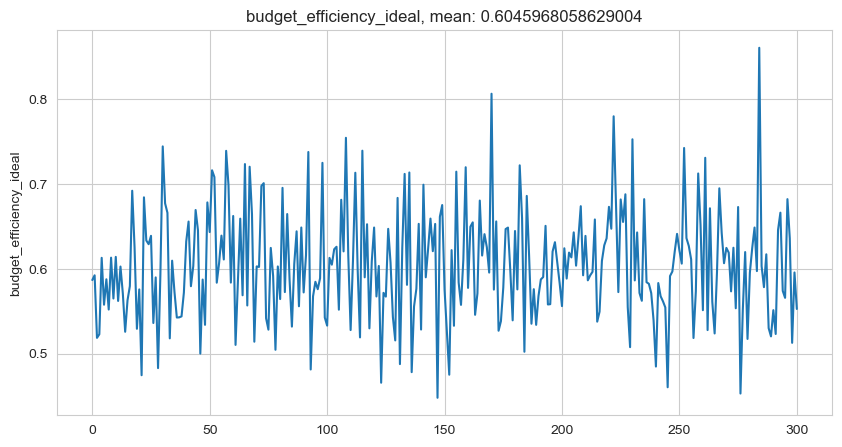

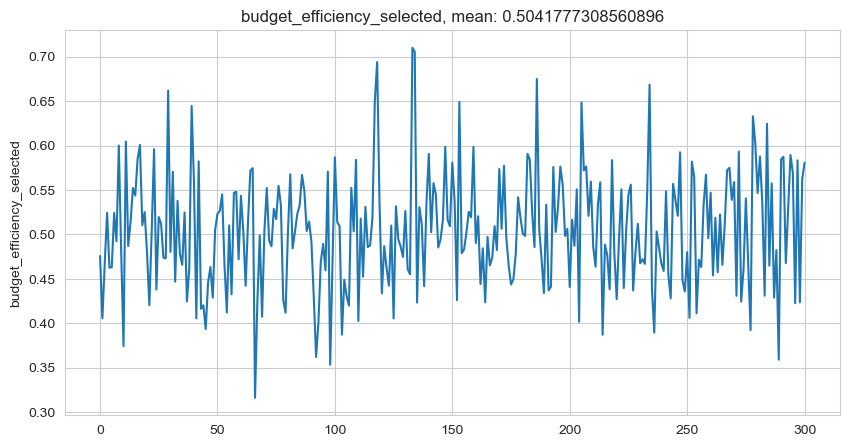

In [4]:
# Plot the KPIs
base_kpis = ['precision', 'recall', 'f1', 'budget_efficiency_ideal', 'budget_efficiency_selected']

for kpi in base_kpis:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df.index, y=kpi, data=df)
    plt.title(f'{kpi}, mean: {df[kpi].mean()}')
    plt.show()
    

overall results seems shitty, but they are all calculated on the actual numbers and not the predicted number. let's see how it is with the predicted FP:

In [5]:
df['predicted_score_gain'] = df['predicted_score_selected'] / df['predicted_score_ideal']
df['actual_score_gain'] = df['actual_score_selected'] / df['actual_score_ideal']
df['budget_efficiency_predicted_ideal'] = df['predicted_score_ideal'] / df['cost_ideal']
df['budget_efficiency_predicted_selected'] = df['predicted_score_selected'] / df['cost_selected']
df['budget_efficiency_predicted_gain'] = df['budget_efficiency_predicted_selected'] / df['budget_efficiency_predicted_ideal']

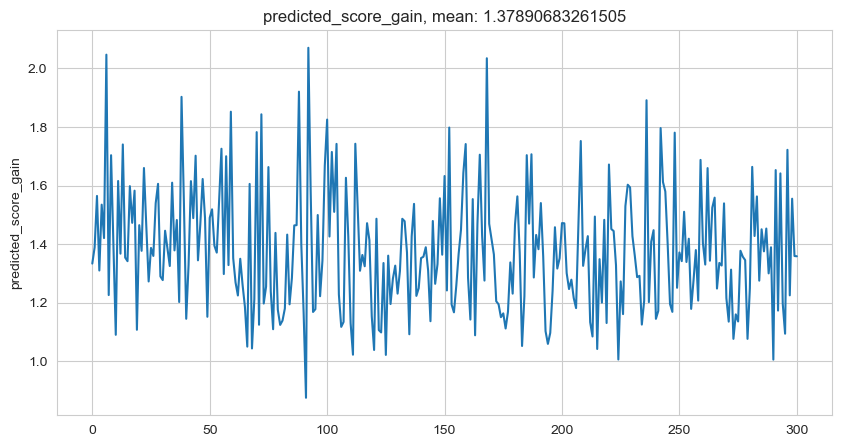

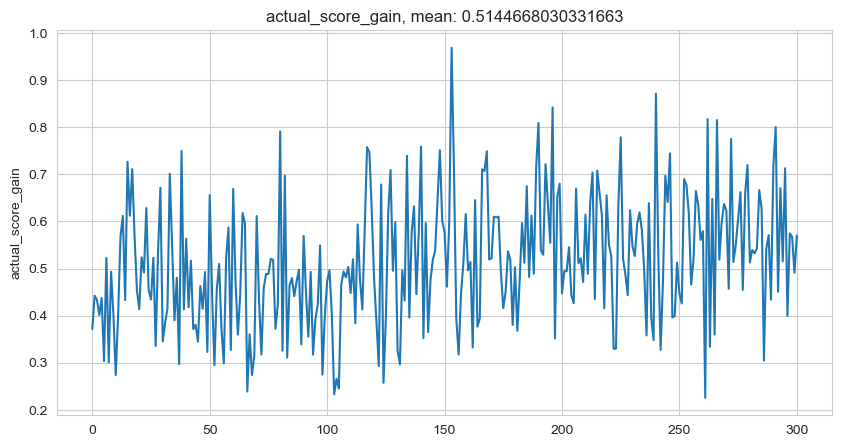

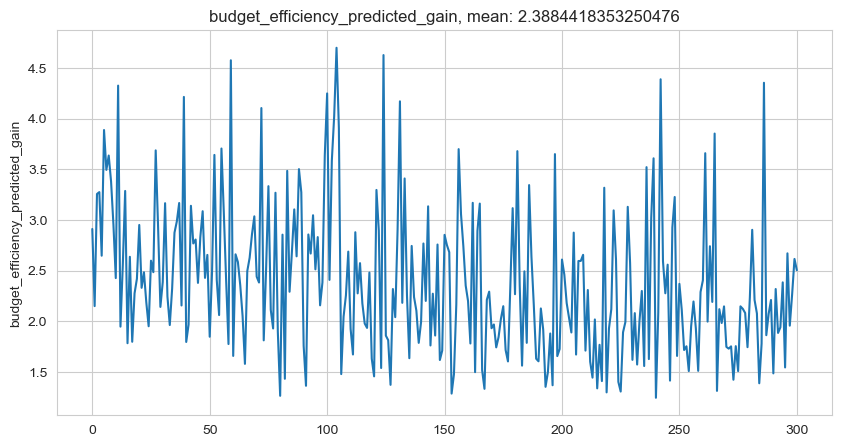

In [6]:
# Plot the KPIs
alt_kpis = ['predicted_score_gain', 'actual_score_gain', 'budget_efficiency_predicted_gain']

for kpi in alt_kpis:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df.index, y=kpi, data=df)
    plt.title(f'{kpi}, mean: {df[kpi].mean()}')
    plt.show()
    

I think what this means is that the selection model is good, but the predictions are not good enough. It could be either data (feature engineering) or model (XGBoost) or both.

We should obviously check replacing the selection model, because it is bugged, but maybe we'll leave it there for a while.